<a href="https://colab.research.google.com/github/pbelouin/imprs_workshop/blob/main/IMPRS_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The goal of this 3 hours session is to introduce you to a number of tools allowing you to perform simple text preparation and analysis tasks, which you can apply to your own corpus. In this notebook, we will go through a short example of how to extract information from your texts using NLP techniques.

### ⚠️ Important

**To start, click the button "Copy to Drive" above this text to create your very own working copy of this notebook! You will need to have a google account.**

## Loading our Text
We need to load the documents we will be analysing into a python "dictionary". First, we need to upload the folder containing our documents to colab. You can find a zip file containing the data [here](https://github.com/pbelouin/imprs_workshop/blob/main/corpus.zip). 

After unzipping it, upload it to Colab files. 

Once this is done, we need a bit of code to load each document into a variable, and add each variable to our dictionary.


In [ ]:
file_1 = open('/content/2015.txt', 'r')
text_1 = file_1.read()
file_1.close()

file_2 = open('/content/2016.txt', 'r')
text_2 = file_2.read()
file_2.close()


file_3 = open('/content/2017.txt', 'r')
text_3 = file_3.read()
file_3.close()


file_4 = open('/content/2018.txt', 'r')
text_4 = file_4.read()
file_4.close()

file_5 = open('/content/2019.txt', 'r')
text_5 = file_5.read()
file_5.close()

file_6 = open('/content/2020.txt', 'r')
text_6 = file_6.read()
file_6.close()

file_7 = open('/content/2022.txt', 'r')
text_7 = file_7.read()
file_7.close()

text_7

each of the interview texts was loaded in a variable, called "text_nmb". To make things easier, we are going to put all these into a [dictionary](https://www.w3schools.com/python/python_dictionaries.asp), which will contain our texts. 

In [2]:
corpus = {'2015': text_1, 
          '2016': text_2, 
          '2017': text_3, 
          '2018': text_4, 
          '2019': text_5, 
          '2020': text_6,
          '2022': text_7}

We can check the size of our dictionary by calling the [len() function](https://www.w3schools.com/python/ref_func_len.asp):

In [3]:
len(corpus)

7

we can then access each text by its index in the dictionary. Try it out: Try to access the '2016', or the '2018' one by changing the index value in the cell below:

In [4]:
corpus['2015']

'Deux Projets D\'Édition Numérique Dans Le Cadre Du Projet SyMoGIH: Le Journal De Léonard Michon Et Les Actes Des Synodes Des Églises Réformées De Bourgogne\nVisualizing Mouvance: Towards an Alignment of Medieval Vernacular Text Traditions\nMapping Languages Performance by Performance\nA Study of Knowledge Integration in Digital Humanities Based on Bibliographic Analysis\nVerbal Identity of a Fictional Character: a Quantitative Study with a Machine Learning Experiment\nCombining Corpora and Statistics using Geographical Technologies: New Evidence on Nineteenth Century Infant Mortality Decline in England and Wales\nDigging into ECCO: Identifying Commonplaces and other Forms of Text Reuse at Scale\nRead, Play, Build: Teaching Sherlock Holmes through Digital Humanities\nChange, Transition and Governance: Lessons from a Long-Term, Large Scale DH Collaboration\nModelling Music Reception: An Ontology For Representing Interpretations of Richard Wagner\'s Leitmotifs\nAuthorship Attribution of 

Congratulations! We now have loaded the data we want to analyse into Python. Now, we can start working on it.

## Data Cleaning

To turn our text into data that can be processed by an NLP algorithm, we need to remove punctuation and _stop words_, that is to say words we are not interested in. To do this, we can use regular expressions, string replacement, and the stopword functions provided by _nltk_. We will encapsulate all these operations in a function so that we can apply them to any text we want.

In [5]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
def clean_and_tokenize(text):

  #removing line breaks
  text = text.replace('\n', ' ')

  #removing punctuation using a regular expression
  text = re.sub("[^-9A-Za-z ]", "" , text)
  text = text.lower()

  #tokenizing
  tokens = nltk.tokenize.word_tokenize(text)
  tokens

  #removing stop words
  stopwords = nltk.corpus.stopwords.words('english')
  new_stopwords = ["the", "la", "to", "de","las"]
  stopwords.extend(new_stopwords)

  clean_tokens = [i for i in tokens if i not in stopwords]
  return clean_tokens

In [7]:
clean_and_tokenize(corpus['2017'])

['using',
 'archival',
 'texts',
 'create',
 'network',
 'graphs',
 'musicians',
 'early',
 'modern',
 'venice',
 'via',
 'video-dance',
 'computer-assisted',
 'composition',
 'mobile',
 'technology',
 'getting',
 'medieval',
 'open',
 'access',
 'networked',
 'pedagogy',
 'tracing',
 'colors',
 'clothing',
 'paintings',
 'image',
 'analysis',
 'google',
 'cultural',
 'institute',
 'affect',
 'collections',
 'museums',
 'case',
 'turkey',
 'digital',
 'hansard',
 'politics',
 'uncivil',
 'reconstructing',
 'readerly',
 'attention',
 'citational',
 'practices',
 'canon',
 '9-',
 'coffee',
 'zone',
 'del',
 'cafetal',
 'al',
 'futuro',
 'coffee',
 'fields',
 'future',
 'digital',
 'humanities',
 'critical',
 'university',
 'studies',
 'machine',
 'vision',
 'algorithms',
 'cadaster',
 'plans',
 'usability',
 'testing',
 'text',
 'analysis',
 'user-response',
 'criticism',
 'close',
 'read',
 'topic',
 'model',
 'twic',
 'reads',
 'emily',
 'dickinsons',
 'fascicles',
 'distant',
 'seeing

## Ngrams, Ngram Frequencies and Visualisation



We need a number of functions from the _nltk_ library, which will allow us to create ngrams from our tokens, and look at their distribution in our texts.

In [8]:
from nltk import ngrams, FreqDist, bigrams

In [9]:
all_text = " ".join(corpus.values())
clean_tokens = clean_and_tokenize(all_text)
clean_ngrams = ngrams(clean_tokens,2)

In [10]:
ngram_fd = FreqDist(clean_ngrams).most_common(20)
ngram_fd

[(('digital', 'humanities'), 236),
 (('case', 'study'), 37),
 (('linked', 'data'), 33),
 (('early', 'modern'), 31),
 (('cultural', 'heritage'), 29),
 (('network', 'analysis'), 27),
 (('open', 'data'), 25),
 (('research', 'data'), 21),
 (('linked', 'open'), 21),
 (('text', 'analysis'), 19),
 (('machine', 'learning'), 17),
 (('authorship', 'attribution'), 17),
 (('digital', 'edition'), 17),
 (('digital', 'scholarship'), 16),
 (('humanities', 'research'), 15),
 (('distant', 'reading'), 15),
 (('big', 'data'), 15),
 (('topic', 'modeling'), 15),
 (('digital', 'history'), 14),
 (('th', 'century'), 14)]

We will use a visualisation library called _matplotlib_ to visualize the frequency of ngrams in our texts.

In [11]:
import matplotlib.pyplot as plt

<BarContainer object of 20 artists>

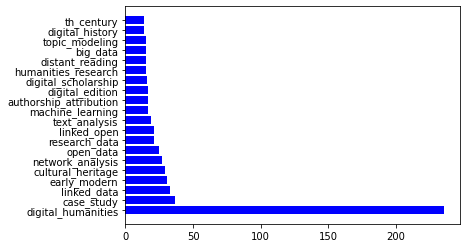

In [12]:
# join the words with '_' in the middle
wrds = ['_'.join(x) for x, c in ngram_fd]

# get the counts
wdth = [c for x, c in ngram_fd]

plt.barh(wrds, wdth, color='blue')


We can package the code necessary to build a chart of the 20 most common ngrams for some text into a function, which is defined below. We can then run this function with any part of the corpus that we wish, and compare the results.

In [13]:
def show_top_20_ngrams(year, number_of_tokens):
  clean_tokens = clean_and_tokenize(corpus[year])
  clean_ngrams = ngrams(clean_tokens,number_of_tokens)
  ngram_fd = FreqDist(clean_ngrams).most_common(20)
  wrds = ['_'.join(x) for x, c in ngram_fd]
  wdth = [c for x, c in ngram_fd]
  plt.barh(wrds, wdth, color='blue')
  plt.title(year)

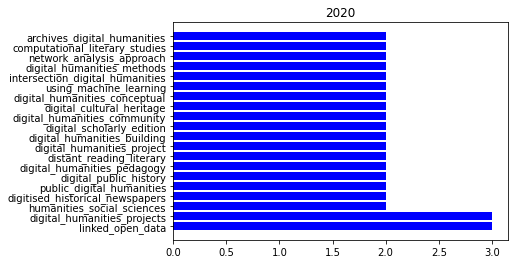

In [14]:
show_top_20_ngrams('2020',3)

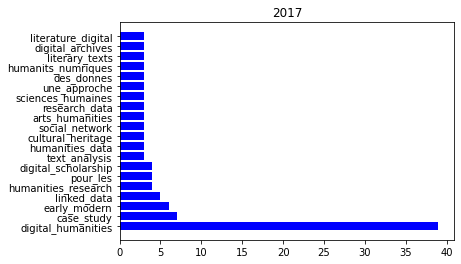

In [15]:
show_top_20_ngrams('2017',2)

##Word Embeddings

To perform word embeddings, we're going to use another library called _gensim_.

In [16]:
import gensim
from gensim.models import Word2Vec
from nltk import sent_tokenize, word_tokenize

In [17]:
#stop words
stopwords = nltk.corpus.stopwords.words('english')
new_stopwords = ["the", "la", "to", "de","las", "an"]
stopwords.extend(new_stopwords)

In [18]:
# we will work on the whole text at once, and extract the sentences from it.
all_text = " ".join(corpus.values())
data = []
 
# iterate through each sentence in the file
for i in sent_tokenize(all_text):
    temp = []
     
    # tokenize the sentence into words. We discard stop words and punctuation.
    for j in word_tokenize(i):
      j = j.lower()
      if (j not in stopwords) and j.isalpha():
        temp.append(j)
 
    data.append(temp)
data[0]

['deux',
 'projets',
 'numérique',
 'dans',
 'le',
 'cadre',
 'du',
 'projet',
 'symogih',
 'le',
 'journal',
 'léonard',
 'michon',
 'et',
 'les',
 'actes',
 'des',
 'synodes',
 'des',
 'églises',
 'réformées',
 'bourgogne',
 'visualizing',
 'mouvance',
 'towards',
 'alignment',
 'medieval',
 'vernacular',
 'text',
 'traditions',
 'mapping',
 'languages',
 'performance',
 'performance',
 'study',
 'knowledge',
 'integration',
 'digital',
 'humanities',
 'based',
 'bibliographic',
 'analysis',
 'verbal',
 'identity',
 'fictional',
 'character',
 'quantitative',
 'study',
 'machine',
 'learning',
 'experiment',
 'combining',
 'corpora',
 'statistics',
 'using',
 'geographical',
 'technologies',
 'new',
 'evidence',
 'nineteenth',
 'century',
 'infant',
 'mortality',
 'decline',
 'england',
 'wales',
 'digging',
 'ecco',
 'identifying',
 'commonplaces',
 'forms',
 'text',
 'reuse',
 'scale',
 'read',
 'play',
 'build',
 'teaching',
 'sherlock',
 'holmes',
 'digital',
 'humanities',
 'cha

In [19]:
# Create CBOW model
model = gensim.models.Word2Vec(data, min_count = 1, window = 10, batch_words = 10)

In [20]:
model.wv.most_similar('dh', topn=5)

[('digital', 0.9864884614944458),
 ('data', 0.9862375855445862),
 ('humanities', 0.9859064221382141),
 ('text', 0.9843984842300415),
 ('using', 0.9830306768417358)]

## Name Entity Recognition
NER is a process through which a chunk of text is parsed through to find entities that can be put under categories such as people, organizations, locations, etc. 

We will use Spacy, an NLP library, to perform basic NER on our text.

Due to a quirk of the model we wish to use, we need to ensure that we are working with the correct encoding, i.e UTF-8. The lines below ensure that it is the case.

In [24]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [21]:
import spacy

We need a pre-trained model (in english), which will perform the NER for us. We could also train our own model, but in this case we borrow this model from Spacy.

In [25]:
!python -m spacy download en_core_web_sm

2023-02-12 12:21:02.718593: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-12 12:21:02.718717: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-12 12:21:02.718740: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 17.3 MB/s

In [26]:
nlp = spacy.load("en_core_web_sm")

In [27]:
from spacy import displacy
doc = nlp(corpus['2018'])
displacy.render(doc, style='ent', jupyter=True, options={'distance': 90})